In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

In [21]:
df= pd.read_csv('C://Users//zhuzh//OneDrive//Рабочий стол//Neoland//FEBRERO//LinealRegression//FuelConsumptionCo2.csv')

In [22]:
X = df[['FUELCONSUMPTION_CITY','CO2EMISSIONS']] #make clusters according to this variables 

In [6]:
X

,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,9.9,196
1,11.2,221
2,6.0,136
3,12.7,255
4,12.1,244
...,...,...
1062,13.4,271
1063,13.2,264
1064,13.4,271
1065,12.9,260


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FUELCONSUMPTION_CITY', ylabel='CO2EMISSIONS'>

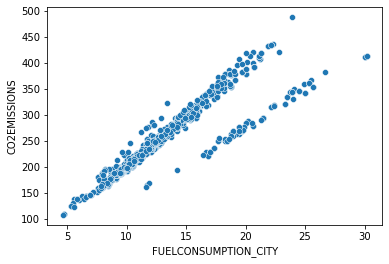

In [23]:
sns.scatterplot(df['FUELCONSUMPTION_CITY'], df['CO2EMISSIONS'])

In [24]:
from sklearn.preprocessing import MinMaxScaler
X_trans = MinMaxScaler().fit_transform(X)
X_trans.shape

(1067, 2)

In [25]:
X_trans

array([[0.20703125, 0.23157895],
       [0.2578125 , 0.29736842],
       [0.0546875 , 0.07368421],
       ...,
       [0.34375   , 0.42894737],
       [0.32421875, 0.4       ],
       [0.40234375, 0.48947368]])

In [ ]:
#to choose radius for DBSCAN model

In [26]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_trans)
distances, indices = nbrs.kneighbors(X_trans)

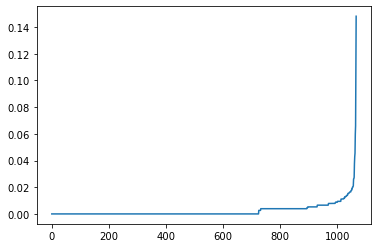

In [12]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [27]:
epsilon = 0.1 #radio
minimumSamples = 3 #patrones
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_trans)
labels = db.labels_
labels



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


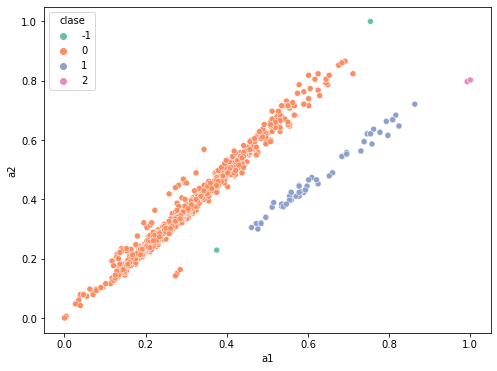

In [29]:
df1 = pd.DataFrame()
df1["a1"]= X_trans[:,0]
df1["a2"] = X_trans[:,1]
df1["clase"]=labels
plt.figure(figsize=(8,6))
sns.scatterplot(df1["a1"],df1["a2"], hue = df1['clase'], palette="Set2")
plt.show()

In [ ]:
#try another radius

In [48]:
epsilon = 0.09 #radio
minimumSamples = 5 #patrones
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_trans)
labels = db.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


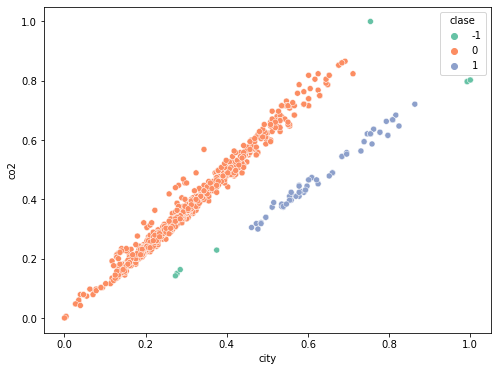

In [49]:
df2 = pd.DataFrame()
df2["city"]= X_trans[:,0]
df2["co2"] = X_trans[:,1]
df2["clase"]=labels
plt.figure(figsize=(8,6))
sns.scatterplot(df2["city"],df2["co2"], hue = df2['clase'], palette="Set2")
plt.show()

# clase 0 regression 

In [51]:
#create 2 regresstions for different classes 
dfclase0 = df2[df2['clase']==0]

In [52]:
#clase 0 regression 
dfclase0

,city,co2,clase
0,0.207031,0.231579,0
1,0.257812,0.297368,0
2,0.054688,0.073684,0
3,0.316406,0.386842,0
4,0.292969,0.357895,0
...,...,...,...
1062,0.343750,0.428947,0
1063,0.335938,0.410526,0
1064,0.343750,0.428947,0
1065,0.324219,0.400000,0


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


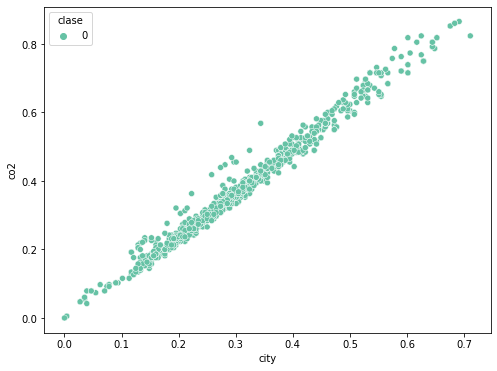

In [53]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfclase0["city"],dfclase0["co2"], hue = dfclase0['clase'], palette="Set2")
plt.show()

In [54]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [62]:
X = dfclase0['city'].values.reshape(974,1)

In [61]:
X.shape

(974,)

In [63]:
y = dfclase0['co2'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [65]:
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)

LinearRegression()

In [66]:
m = regresion_lineal.coef_
b =regresion_lineal.intercept_

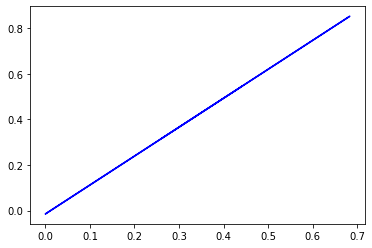

In [67]:
plt.plot(X_train, m*X_train + b, '-b')

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


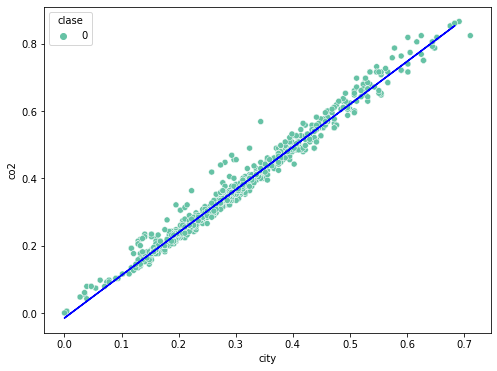

In [68]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfclase0["city"],dfclase0["co2"], hue = dfclase0['clase'], palette="Set2")
plt.plot(X_train, m*X_train + b, '-b')
plt.show()

In [69]:
yhat = regresion_lineal.predict(X_test)

In [70]:
regresion_lineal.score(X_test,y_test)

0.9722887223097454

# regression clase 1



In [80]:
dfclase1 = df2[df2['clase']==1]
dfclase1

,city,co2,clase
145,0.539062,0.373684,1
147,0.578125,0.410526,1
180,0.730469,0.563158,1
182,0.824219,0.647368,1
206,0.554688,0.397368,1
...,...,...,...
725,0.460938,0.305263,1
763,0.515625,0.389474,1
915,0.621094,0.465789,1
918,0.578125,0.423684,1


C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


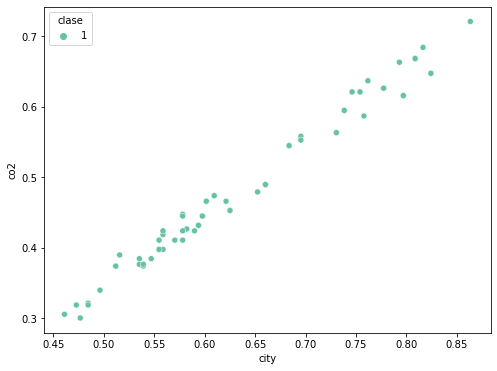

In [81]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfclase1["city"],dfclase1["co2"], hue = dfclase1['clase'], palette="Set2")
plt.show()

In [90]:
X1 = dfclase1['city'].values.reshape(83,1)
y1 = dfclase1['co2'].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20)

In [92]:
regresion_lineal1 = linear_model.LinearRegression()
regresion_lineal1.fit(X_train, y_train)

LinearRegression()

In [93]:
m1 = regresion_lineal1.coef_
b1 =regresion_lineal1.intercept_

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


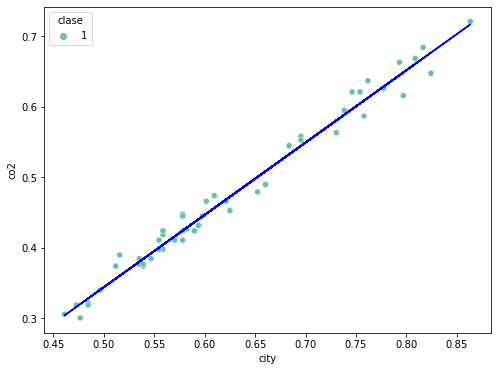

In [94]:
plt.figure(figsize=(8,6))
sns.scatterplot(dfclase1["city"],dfclase1["co2"], hue = dfclase1['clase'], palette="Set2")
plt.plot(X_train, m1*X_train + b1, '-b')
plt.show()

In [95]:
yhat2 = regresion_lineal1.predict(X_test)

In [96]:
regresion_lineal1.score(X_test,y_test)

0.9787668217517721

In [ ]:
#siguente paso : aplicar clases al dataframe inicial para saber que coche pertenece a que clase , quitar clase - 1 outliers 
#primero para predecir necesitamos saber que clase es y luego usar la regression segun la clase 0 o 1 

# same process for another variable CITY

In [98]:
X2 = df[['FUELCONSUMPTION_HWY','CO2EMISSIONS']]

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FUELCONSUMPTION_HWY', ylabel='CO2EMISSIONS'>

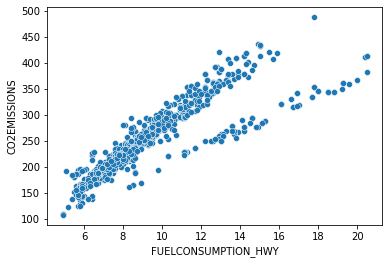

In [99]:
sns.scatterplot(df['FUELCONSUMPTION_HWY'], df['CO2EMISSIONS'])

In [100]:
from sklearn.preprocessing import MinMaxScaler
X_trans = MinMaxScaler().fit_transform(X2)
X_trans.shape

(1067, 2)

In [101]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_trans)
distances, indices = nbrs.kneighbors(X_trans)

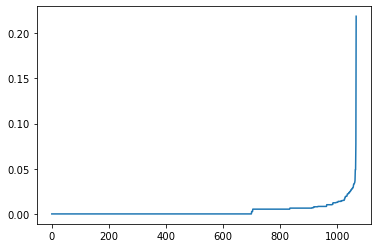

In [102]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [120]:
epsilon = 0.06 #radio
minimumSamples = 3 #patrones
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X_trans)
labels = db.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


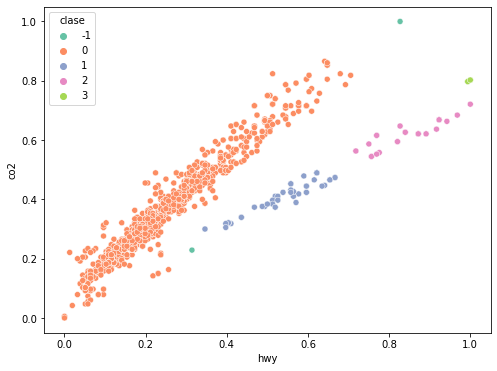

In [121]:
df3 = pd.DataFrame()
df3["hwy"]= X_trans[:,0]
df3["co2"] = X_trans[:,1]
df3["clase"]=labels
plt.figure(figsize=(8,6))
sns.scatterplot(df3["hwy"],df3["co2"], hue = df3['clase'], palette="Set2")
plt.show()

In [122]:
df3['clase'].value_counts()

 0    978
 1     54
 2     29
 3      4
-1      2
Name: clase, dtype: int64

In [123]:
df3['clase'] = df3['clase'].replace({2:1,3:1,-1:1})

In [124]:
df3['clase'].value_counts()

0    978
1     89
Name: clase, dtype: int64

# regression clase 0

In [125]:
df3clase0 = df3[df3['clase']==0]

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


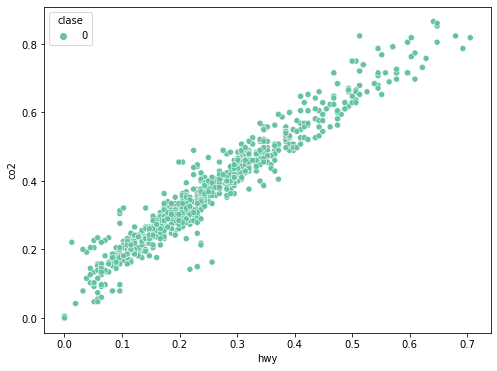

In [127]:
plt.figure(figsize=(8,6))
sns.scatterplot(df3clase0['hwy'],df3clase0["co2"], hue = df3clase0['clase'], palette="Set2")
plt.show()

In [128]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [129]:
df3clase0

,hwy,co2,clase
0,0.115385,0.231579,0
1,0.179487,0.297368,0
2,0.057692,0.073684,0
3,0.269231,0.386842,0
4,0.243590,0.357895,0
...,...,...,...
1062,0.314103,0.428947,0
1063,0.294872,0.410526,0
1064,0.314103,0.428947,0
1065,0.282051,0.400000,0


In [132]:
X3 = df3clase0['hwy'].values.reshape(978,1)
y3 = df3clase0['co2']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.30)

In [134]:
regresion_lineal2 = linear_model.LinearRegression()
regresion_lineal2.fit(X_train, y_train)

LinearRegression()

In [138]:
m2 = regresion_lineal2.coef_
b2 =regresion_lineal2.intercept_

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


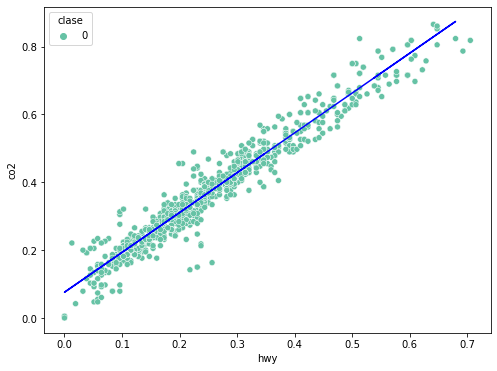

In [139]:
plt.figure(figsize=(8,6))
sns.scatterplot(df3clase0['hwy'],df3clase0["co2"], hue = df3clase0['clase'], palette="Set2")
plt.plot(X_train, m2*X_train + b2, '-b')
plt.show()

In [140]:
yhat3 = regresion_lineal2.predict(X_test).predict(X_test)

In [142]:
regresion_lineal2.score(X_test,y_test)

0.9483354686085377

# regression lineal clase 1 

In [144]:
df3clase1 = df3[df3['clase']==1]

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


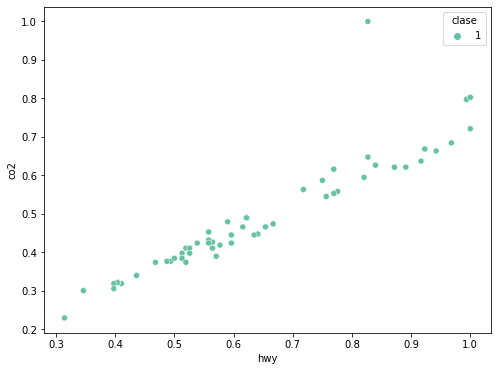

In [145]:
plt.figure(figsize=(8,6))
sns.scatterplot(df3clase1['hwy'],df3clase1["co2"], hue = df3clase1['clase'], palette="Set2")
plt.show()

In [146]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [148]:
df3clase1.shape

(89, 3)

In [149]:
X4 = df3clase1['hwy'].values.reshape(89,1)
y4 = df3clase1['co2']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.20)

In [151]:
regresion_lineal3 = linear_model.LinearRegression()
regresion_lineal3.fit(X_train, y_train)

LinearRegression()

In [152]:
m3 = regresion_lineal3.coef_
b3 =regresion_lineal3.intercept_

C:\Users\zhuzh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


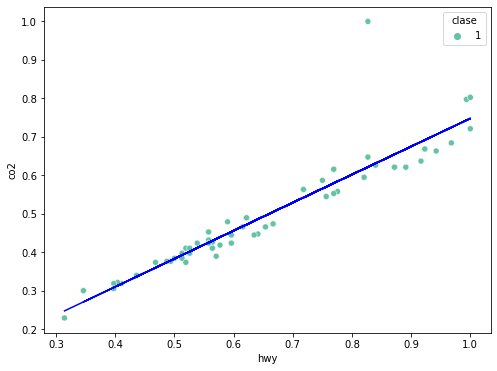

In [153]:
plt.figure(figsize=(8,6))
sns.scatterplot(df3clase1['hwy'],df3clase1["co2"], hue = df3clase1['clase'], palette="Set2")
plt.plot(X_train, m3*X_train + b3, '-b')
plt.show()

In [154]:
yhat4 = regresion_lineal2.predict(X_test)

In [155]:
regresion_lineal3.score(X_test,y_test)

0.9510350882048307

In [156]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
#next step apply classes to the initial dataframe to know which car is which class, remove outliers and passing a new 
#info classify and then choose either regression 1 or 2 